In [114]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#legend.loc:           best
#legend.frameon:       True     # if True, draw the legend on a background patch
#legend.framealpha:    0.8      # legend patch transparency
#legend.facecolor:     inherit  # inherit from axes.facecolor; or color spec
#legend.edgecolor:     0.8      # background patch boundary color
#legend.fancybox:      True     # if True, use a rounded box for the
                                # legend background, else a rectangle
#legend.shadow:        False    # if True, give background a shadow effect
#legend.numpoints:     1        # the number of marker points in the legend line
#legend.scatterpoints: 1        # number of scatter points
#legend.markerscale:   1.0      # the relative size of legend markers vs. original
#legend.fontsize:      medium
#legend.labelcolor:    None
#legend.title_fontsize: None    # None sets to the same as the default axes.

## Dimensions as fraction of font size:
#legend.borderpad:     0.4  # border whitespace
#legend.labelspacing:  0.5  # the vertical space between the legend entries
#legend.handlelength:  2.0  # the length of the legend lines
#legend.handleheight:  0.7  # the height of the legend handle
#legend.handletextpad: 0.8  # the space between the legend line and legend text
#legend.borderaxespad: 0.5  # the border between the axes and legend edge
#legend.columnspacing: 2.0  # column separation

In [4]:
x = np.arange(1, 11, 0.1)

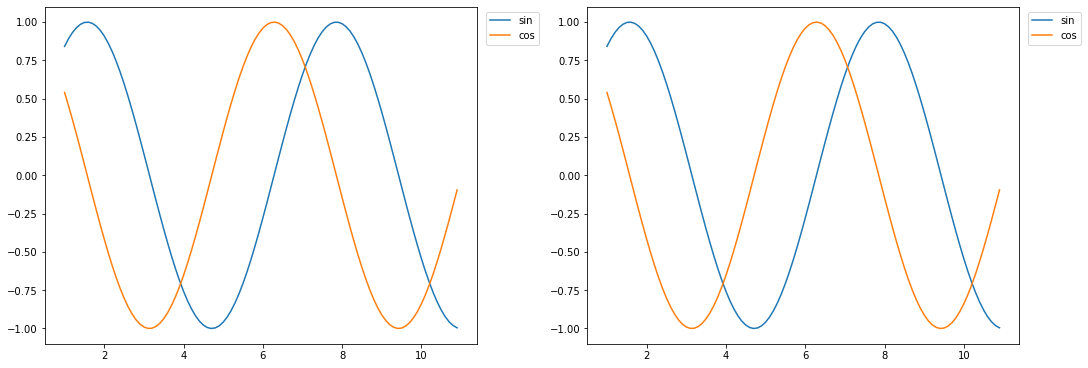

In [5]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5), constrained_layout=True)
ax1.plot(x, np.sin(x), label="sin")
ax1.plot(x, np.cos(x), label="cos")
ax1.legend(bbox_to_anchor=(1.01, 1), bbox_transform=ax1.transAxes, loc="upper left")

ax2.plot(x, np.sin(x), label="sin")
ax2.plot(x, np.cos(x), label="cos")
ax2.legend(bbox_to_anchor=(1.01, 1), bbox_transform=ax2.transAxes, loc="upper left")

In [6]:
np.random.randint(0, 10, 10)

array([8, 3, 9, 0, 6, 9, 5, 7, 5, 6])

In [7]:
from matplotlib.lines import Line2D
from matplotlib.collections import CircleCollection, PatchCollection
from matplotlib.patches import Patch, Annulus, Arc, Arrow, Circle, Rectangle

from matplotlib.legend_handler import HandlerBase

In [8]:
class HandlerSquare(HandlerBase):
    """
    Handler for `.Patch` instances.
    """

    def __init__(self, patch_func=None, **kwargs):
        """
        Parameters
        ----------
        patch_func : callable, optional
            The function that creates the legend key artist.
            *patch_func* should have the signature::
                def patch_func(legend=legend, orig_handle=orig_handle,
                               xdescent=xdescent, ydescent=ydescent,
                               width=width, height=height, fontsize=fontsize)
            Subsequently the created artist will have its ``update_prop``
            method called and the appropriate transform will be applied.
        **kwargs
            Keyword arguments forwarded to `.HandlerBase`.
        """
        super().__init__(**kwargs)
        self._patch_func = patch_func

    def _create_patch(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize):
        print(type(legend))
        if self._patch_func is None:
            p = Rectangle(xy=(-xdescent, -ydescent),
                          width=height, height=height)
        else:
            p = self._patch_func(legend=legend, orig_handle=orig_handle,
                                 xdescent=xdescent, ydescent=ydescent,
                                 width=width, height=height, fontsize=fontsize)
        return p

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        p = self._create_patch(legend, orig_handle,
                               xdescent, ydescent, width, height, fontsize)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

In [48]:
from matplotlib.legend import Legend

In [134]:
def min_side(w, h):
    return min([w, h])

class SquareLegendItem(Patch):
    pass
    
    
    

class SquareHandler(HandlerBase):
    def _create_patch(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize):
        if width > height:
            s = height
            xoffset = (width - height) / 2.0
            yoffset = 0
        else:
            s = width
            xoffset = 0
            yoffset = (height - width) / 2.0
        p = Rectangle(xy=(-xdescent+xoffset, -ydescent+yoffset),
                      width=s, height=s)
        return p
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize, trans):
        p = self._create_patch(legend, orig_handle,
                               xdescent, ydescent, width, height, fontsize)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]
    
    
class RectLegendItem(Patch):
    pass
    
    

class RectHandler(HandlerBase):
    def _create_patch(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize):
        if width/height < 1.2:
            height = height * 0.6
            ydescent = ydescent - height * 0.2
        p = Rectangle(xy=(-xdescent, -ydescent),
                          width=width, height=height)
        return p
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize, trans):
        p = self._create_patch(legend, orig_handle,
                               xdescent, ydescent, width, height, fontsize)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

class CircleLegendItem(Patch):
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        
class CircleHandler(HandlerBase):
    def _create_patch(self, legend, orig_handle,
                      xdescent, ydescent, width, height, fontsize):
        if width > height:
            s = height
            xoffset = (width - height) / 2.0
            yoffset = 0
        else:
            s = width
            xoffset = 0
            yoffset = (height - width) / 2.0
        p = Circle(xy=(-xdescent+s/2+xoffset, -ydescent+s/2+yoffset), radius=s/2)
        return p
    
    def create_artists(self, legend, orig_handle,
                   xdescent, ydescent, width, height, fontsize, trans):
        p = self._create_patch(legend, orig_handle,
                               xdescent, ydescent, width, height, fontsize)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]


In [135]:
hmaps = Legend.get_default_handler_map()

Legend.set_default_handler_map({**hmaps, 
                                SquareLegendItem: SquareHandler(),
                                RectLegendItem: RectHandler(),
                                CircleLegendItem: CircleHandler(),
                               })

24.0 10.74


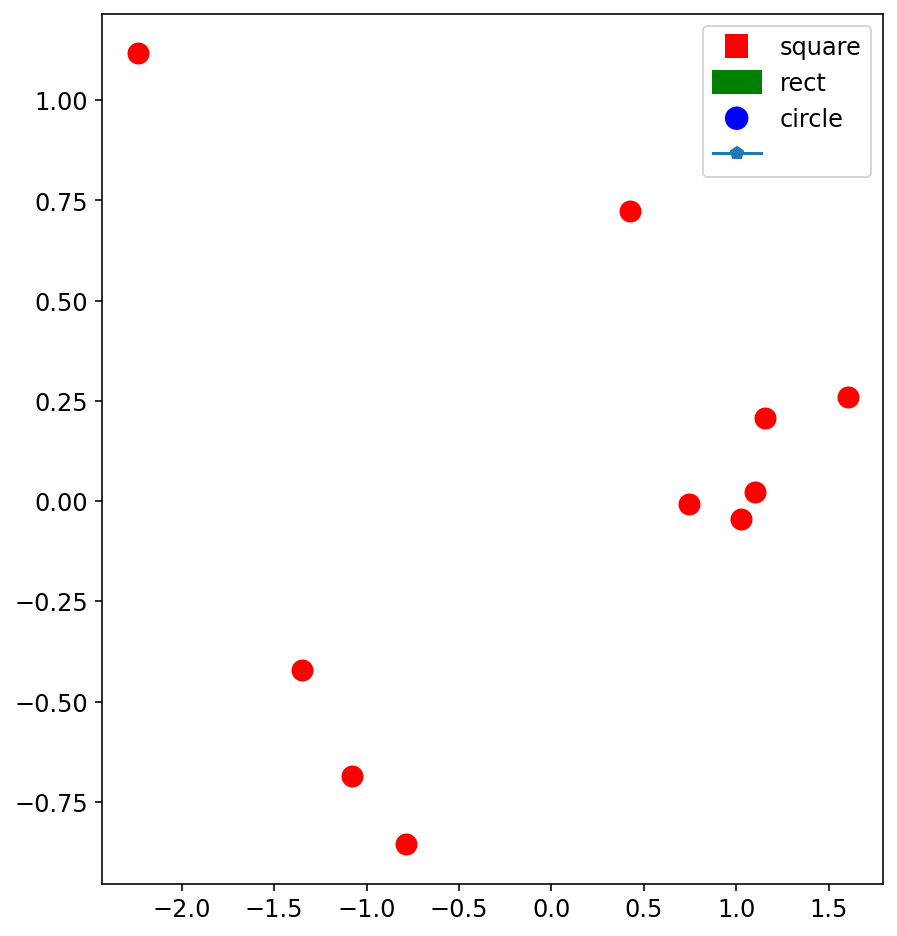

In [137]:
with plt.rc_context({'font.size': 12}):
    _, ax = plt.subplots(figsize=(7, 8))
    ax.scatter(np.random.randn(10), np.random.randn(10), c='r', s=100)
    ax.legend(handles=[
        #Annulus([], 5, 1, label="Annulus"),
        #Arc([], 5, 1, label="arc"),
        #Arrow(1,10,10,1, label="arrow"),
        #Circle([], label="circle"),
        #CircleCollection(sizes=[100], label="Circle2"),
        #PatchCollection([Patch()]),
        SquareLegendItem(color="r", label="square"),
        RectLegendItem(color="g", label="rect"),
        CircleLegendItem(color="b", label="circle"),
        Line2D([], [], marker="p"),
    ],
              handlelength=2,
              handleheight=1,
             #handler_map={SquareLegendItem: SquareHandler(),RectLegendItem: RectHandler(),}
             )

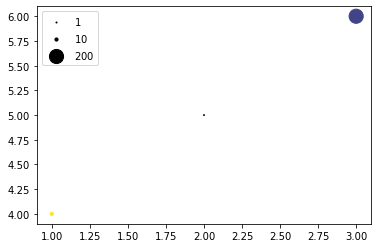

In [106]:
scatter = plt.scatter([1, 2, 3],  [4, 5, 6],  c=[7, 2, 3], s=[10, 1, 200])
plt.legend(*scatter.legend_elements(prop="sizes"))